# Part 1: Import Data and Cleaning the Data

First, we will import the standard imports that will be used throughout our project code.

In [1]:
#standard imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

Then, we are writing a function to grab the data from the specified url.

In [2]:
#downloads the penguin dataset into a local file called palmer_penguins.csv
#grabbing the data 
import urllib
def retrieve_data(url):
    '''
    Retrieves a file from the specified url and saves it in a local file called data.csv.   
    Parameter url: the user inputted url to grab file from
    '''
    
    #grabs the data and parses it
    filedata=urllib.request.urlopen(url) 
    to_write=filedata.read()
    
    #write to file
    with open("data.csv","wb") as f:
        f.write(to_write)

#calling function to grab palmer penguins data
retrieve_data("https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv")

Below is the uncleaned data from the palmer penguins file.

In [3]:
#saves the file as "data.csv" and stores in pandas data frame called penguins
penguins=pd.read_csv("data.csv")  
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


To avoid overfitting, we will separate our data into training and testing data. This will hold out some data that our model won't see at first; this will be our testing data. On the other hand, the model that our model will see is called the training data. 

In [4]:
from sklearn.model_selection import train_test_split

#separates the data into training and test sets before the data is cleaned
train,test=train_test_split(penguins,test_size=.2)

After splitting our data, we are going to clean the data by writing the following function below. This will get rid of unnecessary columns, blank datas, incorrect inputted values, and etc. 

In [5]:
from sklearn import preprocessing

#cleaning the data
def prep_penguin_data(data_df):
    '''
    Cleans the data from the penguins data frame, such as getting rid of unimportant columns,
    blank values, incorrect values, and etc.
    Parameter data_df: the data frame to be cleaned
    Return X: the data frame with the target variable dropped
    Return y: the data frame with only the target variable
    Return df: the full data frame after it is cleaned
    '''
    
    #copying the data
    df=data_df.copy() 
    
    #dropping the columns that are not of use for prediction
    df=df.drop(['Sample Number','Date Egg','Stage','Comments','Individual ID',\
                'Clutch Completion','studyName','Region'],axis=1)
    
    #dropping the NAs in data frame
    df=df.dropna() 
    
    #dropping the "." in Sex
    remove_dot=df['Sex']!='.'  #creating a mask to get rid of the dot "." as a value for Sex
    df=df[remove_dot]          #applying the mask to the data frame
    
    #changing variables to have numerical values
    le=preprocessing.LabelEncoder()
    df['Island']=le.fit_transform(df['Island'])  #changing the three different Islands into numerical values
    df['Sex']=le.fit_transform(df['Sex'])        #changing the two sexes into numerical values
    df['Species']=le.fit_transform(df['Species'])#changing the three different Species into numerical values

    #target and predictor variables 
    X=df.drop(['Species'],axis=1)    #data frame with all the predictor variables
    y=df['Species']                  #data frame with just the target variable
    
    return(X,y,df)       #return X, y, and df

After writing our function, we can apply it to our training data to clean it before we put it in our model. 

In [6]:
#cleaning the penguin train data 
X_train,y_train,traindata=prep_penguin_data(train)

# Part 2: Exploratory Analysis

With all the data in a data frame, it can be hard to see patterns with the features of each species of penguins. To choose which features to predict the penguin species with, we looked at some of the potential predictor variables by creating a table and plotting them on figures. This way, we can visualize which features would be more efficient in determing the penguin species than other features.

### Table 1 : Number of Penguins on Each Island Respective to Their Species

First, we wanted to see how many penguins were on each island, respective to each species. We created a function below to do this. 

In [7]:
def penguin_summary_table(group_cols,value_cols):
    '''
    Creates a summary table that groups together
    Parameter group_cols: the columns that used to group data
    Parameter value_cols: the columns that show the value of the grouped columns
    Return: the summary table of the counts of the grouped data
    '''
    return penguins.groupby(group_cols)[value_cols].count()

In [8]:
#group the data by Species and Island
table1=penguin_summary_table(["Species","Island"],["Sample Number"])

#change the column name into Number of Penguins
table1["Number of Penguins"]=table1["Sample Number"]
#drop the Sample Number Column
table1=table1.drop(labels=["Sample Number"],axis=1)

table1

Number of Penguins
Species                                   Island                       
Adelie Penguin (Pygoscelis adeliae)       Biscoe                     44
                                          Dream                      56
                                          Torgersen                  52
Chinstrap penguin (Pygoscelis antarctica) Dream                      68
Gentoo penguin (Pygoscelis papua)         Biscoe                    124

#### Discussion:

This table is very insightful in demonstating that certain species of penguins such as the Chinstrap penguins and Gentoo penguins are only found on specific islands— Dream for Chinstrap penguins and Biscoe for Gentoo penguins. Furthermore, it also displays that there is a higher number of Gentoo penguins than Adelie Penguin on Biscoe Island. Therefore if we are looking at the Biscoe island as a predictor variable, it is more likely that the penguin species (i.e., the target variable) is a Gentoo penguin.

### Figure 1: Flipper Length of Each Species on their Respective Island 

Next, we wanted to look at the flipper length of each species on each island. We did this by creating a box plot.

Text(0.5, 0, '(Species, Island)')

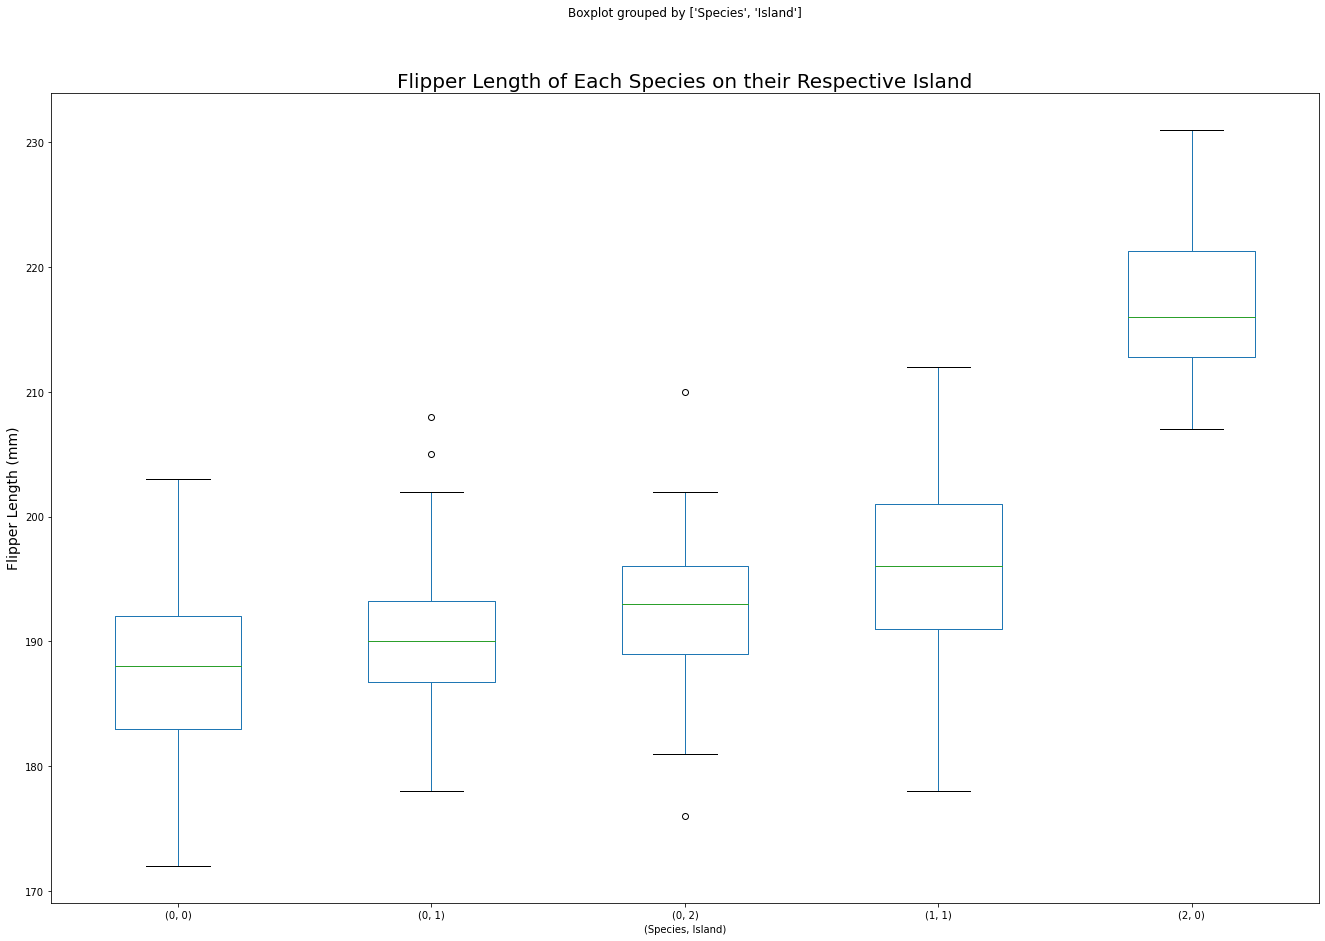

In [9]:
#create the boxplot
ax = traindata.boxplot(column = ['Flipper Length (mm)'], by = ['Species', 'Island'],\
                      figsize = (22,15), grid = False)
#adding title to the boxplot
ax.set_title('Flipper Length of Each Species on their Respective Island', fontsize = 20)
#adding a vertical axis label
ax.set_ylabel('Flipper Length (mm)', fontsize = 14)
#adding a horizontal axis label
ax.set_xlabel('(Species, Island)')

Note: (Species, Island) format for the X axis, where X = 0 refers to Adelie penguins, where X = 1 refers to Chinstrap penguins, X = 2 refers to Gentoo penguins. Y = 0 refers to Biscoe Island and Y = 1 refers to Dream Island, and Y = 2 refers to Torgersen Island.

#### Discussion:

This boxplot is particularly useful in demonstrating the distribution of the penguins' flipper length distribution with respect to their species and island. Based on the graph, we can see that Gentoo penguins have a lengthier flipper length than Adelie penguins. For the two species of penguins, Adelie and Gentoo penguins, that live on Biscoe island, this barplot reveals that we can possibly use length of differentiate the penguin's flipper to predict the species. We could do this by comparing how the penguin's flipper length compares to the mean flipper length for each species. Chinstrap penguins on average also have larger flipper length than Adelie penguins but the difference is much more when comparing Adelie penguins to Gentoo Penguins. This graph also reveals the findings demonstrated in the previous table— that Gentoo penguins are only found on Biscoe Island and Chinstrap penguins are found on Dream Island.

### Figure 2: Body Mass of Male and Female Penguins Body Mass with Respect To Their Species

For this figure, we wanted to compare the body masses of male and female penguins, respective to each species. We created a scatterplot to visualize this.

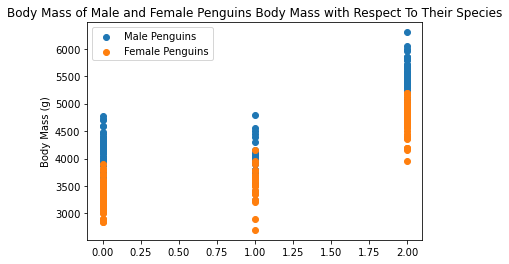

In [10]:
import seaborn as sns

#grab the male penguins in the training data
traindata_male=traindata[traindata['Sex']==1]
#grab the female penguins in the training data
traindata_female=traindata[traindata['Sex']==0]

#create the scatter plot and plot the male penguins data
plt.scatter('Species','Body Mass (g)',data=traindata_male,label="Male Penguins")
#plot the female penguins data
plt.scatter('Species','Body Mass (g)',data=traindata_female,label="Female Penguins")
#add a y axis label
plt.ylabel("Body Mass (g)")
#add the title
plt.title("Body Mass of Male and Female Penguins Body Mass with Respect To Their Species")
#show the legend on the scatterplot
plt.legend()
plt.show()

#### Discussion:

In this scatterplot, we examined the body mass (g) of penguins with respect to species. To do this, we split the dataset into male and female penguins and plotted them on a scatter plot. The blue dots refer to the male penguins and orange dots refer to the female penguins. As we observe the plot, we can tell that the male penguins are almost always heavier than the female penguins. We also observe that the male Gentoo penguins are always heavier than the Adelie and Chinstrap penguins. We also observe that the Adelie and Chinstrap penguins have similar weights.

### Figure 3: Mean Culmen Length and Depth of Each Species Separated By Sex

Lastly, we want to analyze the culmen lengths and depth of each species, separated by sex. To do this, we created a bar plot.

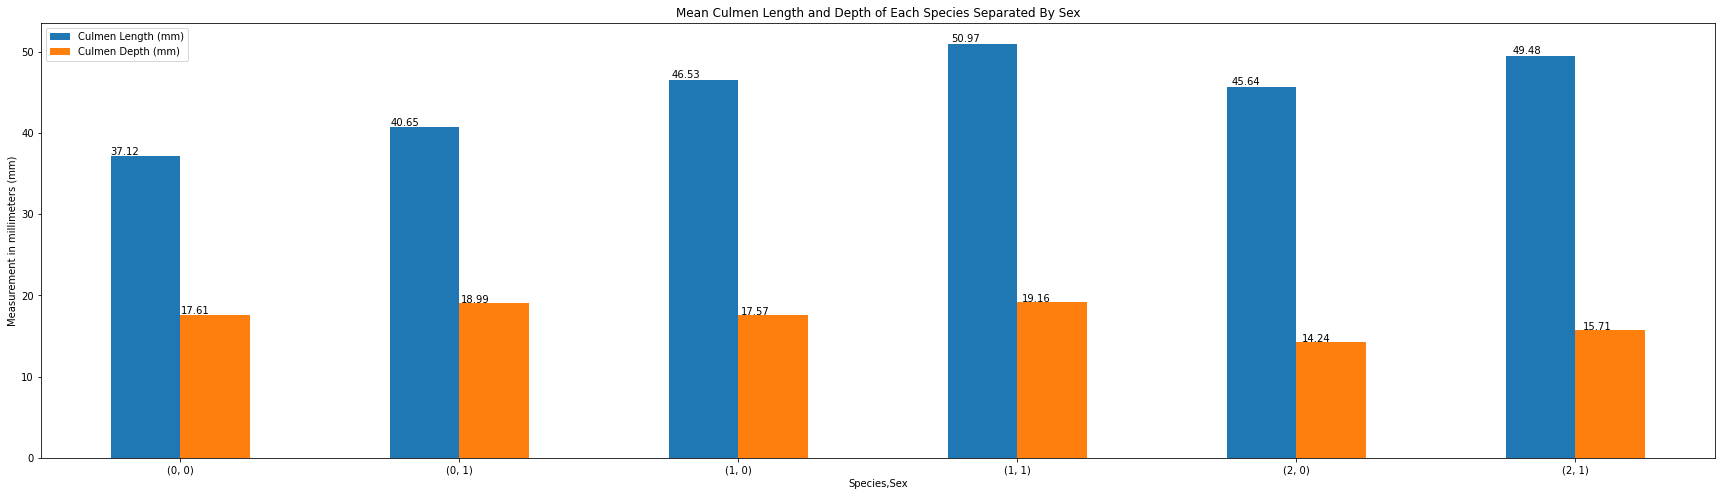

In [11]:
#groups the data by species and sex
cldss=traindata.groupby(["Species","Sex"])[["Culmen Length (mm)","Culmen Depth (mm)"]].mean().round(2)

#plot in a bar plot
ax=cldss.plot.bar(rot=0,figsize=(30,8))
#set titles
ax.set(title="Mean Culmen Length and Depth of Each Species Separated By Sex",\
       ylabel="Measurement in millimeters (mm)")

#add values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

Note: (Species, Sex) format for the X axis, where X = 0 refers to Adelie penguins, where X = 1 refers to Chinstrap penguins, X = 2 refers to Gentoo penguins. Y = 0 refers to female penguins and Y = 1 refers to male penguins. 

#### Discussion:

This bar plot shows us the mean culmen length and depth for each species separated by sex. From this plot, we can see that male penguins tend to have longer culmen lengths and depths than female penguins. In addition, it displays that Chinstrap penguins have the longest culmen length, followed by the Gentoo, then Adelie penguins who have a much shorter culmen length than the other two species. On the other hand, Adelie penguins have the longest culmen depth, followed by the Chinstrap, then Gentoo penguins who have a much shorter culmen depth than the other two species.

# Part 3: Modeling

After our exploratory analysis, we created 3 different machine learning models to predict the penguin species using 1 qualitative feature and 2 quantitative features. Below are the imports that we used for our models.

In [12]:
#imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits

### Machine Learning Model 1: Multinomial Logistic Regression

Logistic Regression uses an S-shaped curve, known as a logistic function. The function maps real-valued numbers to a value between 0 and 1. Due to this, we can categorize a dependent variable into of the two categories. This differs from multinomial logistic regression which is the model we are using in this mini project as multinomial logistic regression’s classification can involves classifying a variable into one of more than two categories. We can use this model to predict the categorical membership of a penguin whose species is an unknown category.

In [13]:
LR=LogisticRegression(C=0.05,max_iter=1000)
cross_val_score(LR,X_train,y_train,cv=5).mean()

LR.fit(X_train,y_train)
LR.score(X_train,y_train)

0.9961389961389961

In [14]:
C_pool=np.linspace(.005,.05,10)
best_score1=-np.inf

for c in C_pool:
    LR=LogisticRegression(C=c,max_iter=5000)
    score=cross_val_score(LR,X_train,y_train,cv=5).mean()
    if score>best_score1:
        best_score1=score
        best_c=c
    print("C = ",np.round(c,3)," Cross validation score = ",score)

C =  0.005  Cross validation score =  0.9728506787330318
C =  0.01  Cross validation score =  0.9805429864253394
C =  0.015  Cross validation score =  0.9843891402714933
C =  0.02  Cross validation score =  0.9922322775263952
C =  0.025  Cross validation score =  0.9922322775263952
C =  0.03  Cross validation score =  0.9922322775263952
C =  0.035  Cross validation score =  0.9922322775263952
C =  0.04  Cross validation score =  0.9922322775263952
C =  0.045  Cross validation score =  0.9922322775263952
C =  0.05  Cross validation score =  0.9922322775263952


Now that we have a reasonable of the opitimal c value, we can try evaluating on the unseen data for Model 1: Multinomial Logistic Regression

In [15]:
def check_column_scoreLR(cols):
    """
    Trains and evaluates the model via crossvalidation on the columns
    of the dataset with select indices
    """
    print("training with columns "+str(cols))

    LR=LogisticRegression(C=best_c,max_iter=5000)
    return cross_val_score(LR,X_train[cols],y_train,cv=5).mean()

In [16]:
combos = [['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Sex', 'Body Mass (g)', 'Culmen Length (mm)'],
          ['Sex', 'Body Mass (g)', 'Culmen Depth (mm)'],
          ['Sex', 'Flipper Length (mm)', 'Body Mass (g)'],
          ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Island', 'Body Mass (g)', 'Culmen Length (mm)'],
          ['Island', 'Body Mass (g)', 'Culmen Depth (mm)'],
          ['Island', 'Flipper Length (mm)', 'Body Mass (g)'],
          ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)']]

for combo in combos:
    x=check_column_scoreLR(combo)
    print("CV score is "+str(np.round(x,3)))

training with columns ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.938
training with columns ['Sex', 'Body Mass (g)', 'Culmen Length (mm)']
CV score is 0.946
training with columns ['Sex', 'Body Mass (g)', 'Culmen Depth (mm)']
CV score is 0.791
training with columns ['Sex', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is 0.676
training with columns ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score is 0.946
training with columns ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score is 0.807
training with columns ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.946
training with columns ['Island', 'Body Mass (g)', 'Culmen Length (mm)']
CV score is 0.868
training with columns ['Island', 'Body Mass (g)', 'Culmen Depth (mm)']
CV score is 0.791
training with columns ['Island', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is 0.683
training with columns ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score is 0.946
tra

In [17]:
X_test,y_test,testdata=prep_penguin_data(test)

In [18]:
def test_column_scoreLR(cols):
    """
    Test model performance on the data with selected columns
    """
    
    print("training with columns "+str(cols))
    LR=LogisticRegression(C=best_c,max_iter=5000)
    LR.fit(X_train[cols],y_train)
    
    return LR.score(X_test[cols],y_test)

In [19]:
for combo in combos:
    x=test_column_scoreLR(combo)
    print("The test score is "+str(np.round(x,3)))

training with columns ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
The test score is 0.985
training with columns ['Sex', 'Body Mass (g)', 'Culmen Length (mm)']
The test score is 0.985
training with columns ['Sex', 'Body Mass (g)', 'Culmen Depth (mm)']
The test score is 0.785
training with columns ['Sex', 'Flipper Length (mm)', 'Body Mass (g)']
The test score is 0.662
training with columns ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)']
The test score is 0.985
training with columns ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)']
The test score is 0.8
training with columns ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']
The test score is 0.985
training with columns ['Island', 'Body Mass (g)', 'Culmen Length (mm)']
The test score is 0.969
training with columns ['Island', 'Body Mass (g)', 'Culmen Depth (mm)']
The test score is 0.785
training with columns ['Island', 'Flipper Length (mm)', 'Body Mass (g)']
The test score is 0.662
training with columns ['Island', 'Culmen 

In [20]:
LR=LogisticRegression(C=0.05,max_iter=5000)

LR.fit(X_test,y_test)
LR.score(X_test,y_test)

1.0

In [21]:
from sklearn.datasets import load_digits
digits=load_digits()

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target)

In [23]:
model1=LogisticRegression(random_state=0,solver='liblinear')
cross_val_score(model1,X_train,y_train,cv=10).mean()

0.9554726368159201

In [24]:
model1.fit(X_test,y_test)
y_test_pred=model1.predict(X_test)
y_test_pred

array([1, 5, 3, 4, 9, 3, 6, 0, 9, 3, 2, 2, 2, 1, 6, 5, 4, 8, 6, 9, 8, 0,
       4, 7, 5, 6, 3, 1, 8, 3, 6, 1, 0, 5, 8, 7, 5, 8, 8, 1, 3, 1, 0, 1,
       5, 5, 1, 2, 2, 8, 1, 6, 3, 7, 1, 2, 3, 3, 9, 5, 0, 1, 7, 3, 4, 2,
       7, 9, 9, 6, 9, 9, 3, 6, 3, 2, 2, 2, 1, 9, 3, 2, 4, 8, 9, 4, 7, 5,
       1, 7, 6, 0, 5, 2, 0, 0, 1, 2, 8, 5, 7, 8, 4, 9, 0, 2, 7, 2, 1, 4,
       7, 4, 7, 0, 8, 8, 4, 3, 8, 1, 7, 8, 0, 2, 3, 7, 5, 3, 1, 5, 9, 6,
       7, 3, 5, 8, 5, 1, 6, 0, 3, 1, 8, 4, 3, 8, 4, 2, 9, 0, 3, 5, 4, 5,
       7, 0, 7, 3, 6, 7, 0, 1, 6, 8, 4, 6, 3, 4, 6, 1, 3, 7, 6, 1, 2, 2,
       8, 7, 6, 6, 6, 4, 0, 6, 4, 6, 5, 5, 3, 1, 5, 0, 2, 7, 7, 8, 4, 2,
       1, 7, 4, 0, 0, 9, 8, 1, 6, 6, 3, 0, 8, 4, 3, 1, 9, 2, 9, 3, 3, 3,
       4, 9, 9, 9, 2, 9, 7, 0, 5, 8, 5, 1, 5, 5, 7, 3, 0, 2, 8, 4, 5, 8,
       2, 8, 7, 9, 9, 2, 1, 3, 2, 0, 5, 6, 9, 3, 3, 8, 4, 8, 6, 2, 4, 6,
       4, 6, 5, 6, 6, 0, 1, 1, 8, 1, 9, 7, 5, 7, 8, 2, 1, 8, 5, 5, 8, 0,
       5, 4, 4, 8, 0, 6, 2, 4, 2, 8, 8, 4, 5, 9, 6,

In [25]:
c=confusion_matrix(y_test,y_test_pred)
c

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 47,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 40]])

### Machine Learning Model 2: Random Forest Classifier

Random forest classifiers uses multiple decision trees in its implementation of its classification algorithm. This model has a feature of randomness and employs the use of averaging to help improve accuracy of the predictions and help control over-fitting.

In [26]:
from sklearn.datasets import load_digits
digits=load_digits()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target)

In [27]:
model2=RandomForestClassifier(random_state=0)
cross_val_score(model2,X_test,y_test,cv=10).mean()

0.9488888888888889

In [28]:
model2.fit(X_test,y_test)
y_test_pred=model2.predict(X_test)
y_test_pred

array([7, 1, 1, 7, 2, 7, 4, 0, 1, 4, 3, 4, 1, 0, 7, 6, 8, 6, 5, 8, 9, 4,
       2, 9, 2, 3, 2, 1, 8, 8, 8, 8, 0, 9, 6, 2, 3, 7, 3, 2, 2, 9, 4, 1,
       9, 8, 7, 4, 4, 5, 4, 1, 6, 9, 6, 9, 4, 0, 6, 3, 8, 2, 2, 6, 6, 6,
       1, 0, 8, 6, 4, 3, 8, 4, 6, 4, 9, 3, 4, 1, 7, 9, 7, 9, 8, 9, 5, 6,
       5, 9, 2, 7, 7, 3, 0, 3, 5, 5, 2, 3, 0, 4, 3, 3, 2, 7, 4, 5, 8, 9,
       3, 9, 2, 9, 7, 6, 8, 2, 5, 1, 1, 2, 3, 6, 2, 0, 6, 2, 5, 1, 4, 8,
       9, 5, 0, 8, 4, 6, 5, 6, 9, 1, 7, 6, 3, 4, 1, 3, 2, 0, 8, 0, 4, 9,
       9, 0, 6, 4, 4, 9, 5, 0, 8, 3, 3, 4, 3, 1, 6, 6, 5, 0, 8, 7, 5, 5,
       3, 5, 1, 9, 4, 9, 4, 9, 3, 3, 4, 1, 3, 0, 5, 5, 2, 3, 7, 2, 1, 8,
       6, 9, 3, 0, 0, 3, 5, 8, 3, 5, 5, 0, 3, 2, 2, 0, 3, 2, 8, 4, 3, 2,
       6, 6, 2, 0, 0, 5, 8, 4, 5, 3, 1, 0, 1, 5, 4, 9, 8, 5, 5, 6, 3, 4,
       3, 2, 1, 4, 5, 2, 1, 5, 6, 4, 5, 9, 3, 8, 8, 7, 0, 4, 1, 4, 2, 7,
       6, 6, 7, 6, 7, 6, 0, 4, 0, 4, 7, 7, 3, 5, 5, 4, 9, 8, 6, 6, 3, 7,
       1, 9, 2, 0, 7, 0, 4, 6, 2, 0, 6, 8, 0, 0, 9,

In [29]:
N=30
scores=np.zeros(N)
best_score2=-np.inf

for n in range(1,N+1):
    RFC=RandomForestClassifier(n_estimators=n)
    scores[n-1]=cross_val_score(RFC,X_train,y_train,cv=5).mean()
    if scores[n-1]>best_score2:
        best_score2=scores[n-1]
        best_n_estimator=n
        
best_n_estimator,best_score2

(25, 0.965108082059755)

Now that we have a reasonable of the opitimal n estmiator, we can try evaluating on the unseen data for Model 2: Random Forest Classifier

#### Confusion Matrix for Model 2: Random Forest Classifier

In [35]:
c2=confusion_matrix(y_test,y_test_pred)
c2

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 38]])

### Machine Learning Model 3: Support Vector Machines

When we are given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. SVM maps training examples to points in space so as to maximize the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall. 

The objective of the support vector machine algorithm, in a nut shell, is to find a hyperplane in an N-dimensional space(where n is the number of features) that distinctly classifies the data points. Our goal is to find a plane that has the maximum margin(the maximum distance between data points of both classes). Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

In [36]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm.score(X_train, y_train), svm.score(X_test, y_test)

(1.0, 0.9822222222222222)

Now we perform 5-fold CV to further qualify our model. From the results we can tell that this model is very accurate.

In [39]:
scores = cross_val_score(svm, X_test, y_test, cv=5)
scores

array([0.93333333, 0.96666667, 0.96666667, 0.96666667, 0.96666667])

In [40]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  2,  1,  0,  0,  1,  0,  0, 41,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 37]])

### Decision Region Plots

We have collectively agreed that for the plotting regions section of this mini project, we would focus on sex, culmen length and culmen depth as the predictor variables to help us predict the penguin's species (i.e., the target variable). One of the reason's we decided to do this is directly related to our discussion for Figure 3— Mean Culmen Length and Depth of Each Species Separated By Sex. As a refresher for what was discussed, figure revealed that male penguins tend to have longer culmen lengths and depths than female penguins. It also demonstrated that of the 3 species, Chinstrap penguins have the longest culmen length. It also revealed that Adelie penguins have the longest culmen depth. After completing the cross validation for all 3 models, we found that sex, culmen length and culmen depth scored relatively high in comparison to the other combination of features. This commonality further motivated us to use these features to plot decision regions to see how they differ between the models. We believe we will gain insightful information through the direct comparison; that is why we are finalizing these features.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
df1=penguins.copy()
  
#drop columns that are not of use for prediction
df1=df1.drop(['Sample Number','Date Egg','Stage','Comments','Individual ID','studyName','Region'],axis=1)
# drop NAs in data frame
df1=df1.dropna() 
df1 = df1[['Species', 'Island', 'Culmen Length (mm)', 'Body Mass (g)']]
#target and predictor variables 
X=df1.drop(['Species'], axis = 1)
y=df1['Species']

#changes the target variable to have numerical values
le=preprocessing.LabelEncoder()
X['Island']=le.fit_transform(X['Island'])
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

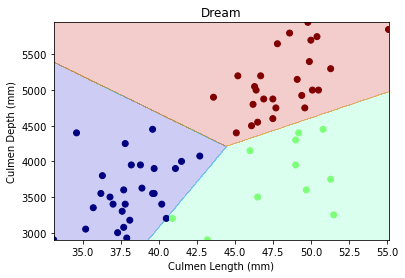

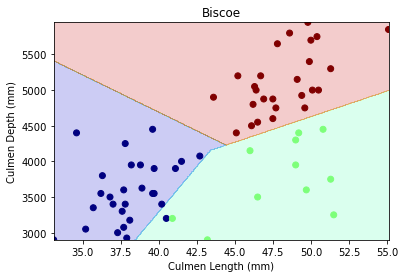

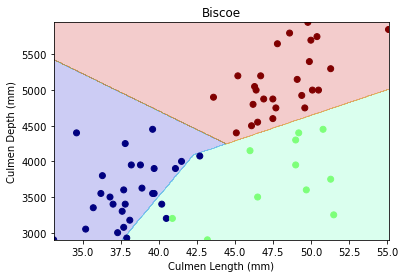

In [55]:
def plot_regions(c, X, y, i):
    """
    Plots the decision regions of a classifier
    c: the classifier
    X: predictor variables
    y: target variable
    i: island
    """
    #fit model / fit data in the classifier
    c.fit(X,y)
    # specify x0 and x1
    x0=X['Culmen Length (mm)']
    x1=X['Body Mass (g)']

    grid_x=np.linspace(x0.min(),x0.max(),501)
    grid_y=np.linspace(x1.min(),x1.max(),501)
    xx,yy=np.meshgrid(grid_x,grid_y)
    # creating 1D arrays
    XX=xx.ravel()
    YY=yy.ravel()
    zz=np.ones_like(XX) * i
    #make predictions
    p=c.predict(np.c_[zz, XX, YY])

    #reshape p back into a 2d array
    p=p.reshape(xx.shape)

    fig,ax = plt.subplots(1) #creates the fig and the ax 
    ax.contourf(xx,yy,p,cmap="jet",alpha=.2) #this plots the decision boundaries
    ax.scatter(x0,x1,c=y,cmap="jet") #this plots the points
    
    if i == 0:
        l = "Torgerson"
        ax.set(title = "Torgerson")
    elif i == 1:
        l = "Dream"
        ax.set(title = "Dream")
    else:
        l = "Biscoe"
        ax.set(title = "Biscoe")
    
    #labeling our axis
    ax.set(xlabel="Culmen Length (mm)",ylabel="Culmen Depth (mm)")

plot_regions(svm, X_test, y_test, 1)
plot_regions(svm, X_test, y_test, 2)
plot_regions(svm, X_test, y_test, 3)

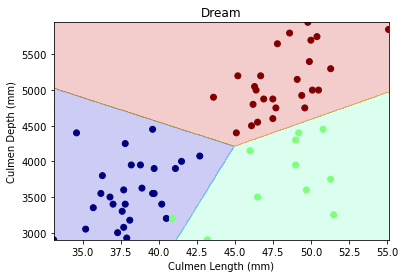

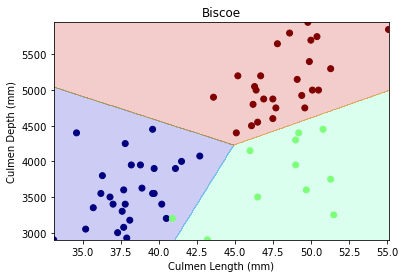

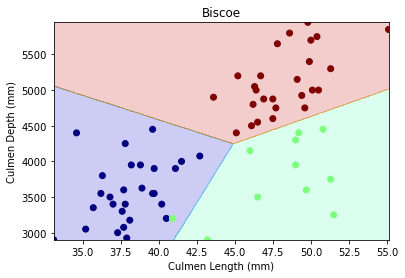

In [57]:
plot_regions(LR, X_test, y_test, 1) 
plot_regions(LR, X_test, y_test, 2) 
plot_regions(LR, X_test, y_test, 3)

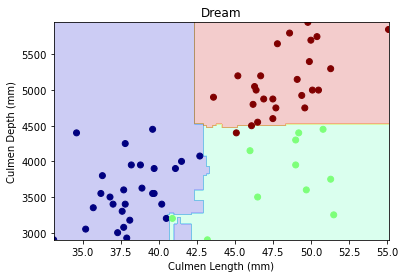

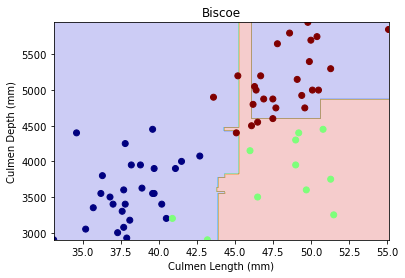

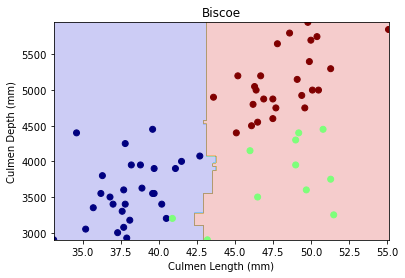

In [58]:
plot_regions(RFC, X_test, y_test, 1) 
plot_regions(RFC, X_test, y_test, 2) 
plot_regions(RFC, X_test, y_test, 3)

After looking at the plot region for the random forest classifier, we find that mistakes found in the model are due to how random forests are typically to be biased in their with categorical variables. This is evident in the plot region with the concentration and distribution of the points as they tend to be centered more in within their category